In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('1', '0', '1', '0', '0', '0', '0', '0')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ A ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import *
from utils.nxcs_utils import *

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_maze_metrics)

XNCScfg = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100)


In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 3
explore = 2000
exploit = 500

df_other = XNCSExp(
    maze=maze,
    cfg=XNCScfg,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )

df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=0,
             exploit_trials=exploit + explore,
             pre_generate=True
           )



Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.3876943999999996, 'numerosity': 1600, 'population': 1498, 'average_specificity': 7.911875, 'fraction_accuracy': 0.95, 'knowledge': 6.164383561643835}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 6, 'reward': 1160.623320451948, 'perf_time': 0.047101699999998914, 'numerosity': 1600, 'population': 1163, 'average_specificity': 7.045625, 'fraction_accuracy': 0.91, 'knowledge': 9.58904109589041}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 7, 'reward': 1138.5646001160228, 'perf_time': 0.08202970000000676, 'numerosity': 1600, 'population': 1049, 'average_specificity': 7.64375, 'fraction_accuracy': 0.95, 'knowledge': 5.47945205479452}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 72, 'reward': 1000.0000000197018, 'perf_time': 0.6064908999999972, 'numerosity': 1600, 'population': 1117, 'average_specificity': 8.715625, 'fraction_accuracy': 0.99, 'knowledge': 5.47945205479452}
INFO

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.8969012999999677, 'numerosity': 1600, 'population': 1495, 'average_specificity': 8.58375, 'fraction_accuracy': 0.98, 'knowledge': 6.164383561643835}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 1324.9446829222925, 'perf_time': 0.03166279999999233, 'numerosity': 1600, 'population': 1140, 'average_specificity': 6.7675, 'fraction_accuracy': 0.98, 'knowledge': 1.36986301369863}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 9, 'reward': 1050.4487000737424, 'perf_time': 0.09348740000001499, 'numerosity': 1600, 'population': 1068, 'average_specificity': 7.65125, 'fraction_accuracy': 0.87, 'knowledge': 0.684931506849315}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 3, 'reward': 1452.7801773843607, 'perf_time': 0.04035550000003241, 'numerosity': 1600, 'population': 1048, 'average_specificity': 7.479375, 'fraction_accuracy': 0.96, 'knowledge': 0.684931506849315}
INFO:

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.6700117999999975, 'numerosity': 1600, 'population': 1483, 'average_specificity': 8.211875, 'fraction_accuracy': 0.97, 'knowledge': 5.47945205479452}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 9, 'reward': 1049.078543593884, 'perf_time': 0.11612999999999829, 'numerosity': 1600, 'population': 1234, 'average_specificity': 7.119375, 'fraction_accuracy': 0.94, 'knowledge': 4.794520547945205}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 3, 'reward': 1385.3327583750827, 'perf_time': 0.020420199999989563, 'numerosity': 1600, 'population': 1153, 'average_specificity': 7.55, 'fraction_accuracy': 0.97, 'knowledge': 4.10958904109589}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 5, 'reward': 1180.4229351, 'perf_time': 0.05793889999995372, 'numerosity': 1600, 'population': 1170, 'average_specificity': 8.23875, 'fraction_accuracy': 0.98, 'knowledge': 4.10958904109589}
INFO:lcs.agent

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.1887324999997873, 'population': 1487, 'numerosity': 1600, 'average_specificity': 8.676875, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 6, 'reward': 1150.559810577107, 'perf_time': 0.07607809999990423, 'population': 1037, 'numerosity': 1600, 'average_specificity': 6.975625, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 100, 'reward': 2.9209299907019724e-42, 'perf_time': 0.5741263999998409, 'population': 903, 'numerosity': 1600, 'average_specificity': 6.46625, 'knowledge': 98.63013698630137}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 7, 'reward': 1102.9123040443103, 'perf_time': 0.06670200000007753, 'population': 816, 'numerosity': 1600, 'average_specificity': 6.555625, 'knowledge': 99.31506849315068}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 12, 'reward': 1018.0281068806024, 'perf_time': 0.11508969999999863, 'popula

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.3301629000000048, 'population': 1468, 'numerosity': 1600, 'average_specificity': 8.335625, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 3, 'reward': 1804.1016198493778, 'perf_time': 0.0152432999998382, 'population': 1027, 'numerosity': 1600, 'average_specificity': 6.89375, 'knowledge': 98.63013698630137}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 3, 'reward': 1358.6641565968293, 'perf_time': 0.01326680000011038, 'population': 922, 'numerosity': 1600, 'average_specificity': 6.07875, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 5, 'reward': 1183.790922092776, 'perf_time': 0.03172150000000329, 'population': 852, 'numerosity': 1600, 'average_specificity': 6.008125, 'knowledge': 99.31506849315068}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 16, 'reward': 1004.1731173296699, 'perf_time': 0.14344310000001315, 'population': 

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.1940320000001066, 'population': 1498, 'numerosity': 1600, 'average_specificity': 8.653125, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 1484.0036104420547, 'perf_time': 0.051321600000164835, 'population': 1085, 'numerosity': 1600, 'average_specificity': 7.058125, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 5, 'reward': 1242.6811185590989, 'perf_time': 0.05487130000005891, 'population': 954, 'numerosity': 1600, 'average_specificity': 7.383125, 'knowledge': 99.31506849315068}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 3, 'reward': 1416.69933595584, 'perf_time': 0.018198900000015783, 'population': 888, 'numerosity': 1600, 'average_specificity': 7.556875, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 4, 'reward': 1309.5258043729204, 'perf_time': 0.04450309999992896, 'population': 886, 'num

In [13]:
df['steps_in_trial_other']=df_other['steps_in_trial']
df['population_other']=df_other['population']
df['numerosity_other']=df_other['numerosity']
df['average_specificity_other']=df_other['average_specificity']
df['fraction_accuracy_other']=df_other['fraction_accuracy']
df['knowledge_other']=df_other['knowledge']

display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,knowledge,steps_in_trial_other,population_other,numerosity_other,average_specificity_other,fraction_accuracy_other,knowledge_other
trial,,,,,,,,,,,,,
0,100.000000,0.000000,1.237642,1484.333333,1600.0,8.555208,100.000000,100.000000,1492.000000,1600.0,8.235833,0.966667,5.936073
100,37.000000,817.855486,0.307822,1128.333333,1600.0,6.960833,98.630137,7.000000,1249.666667,1600.0,7.300208,0.980000,5.936073
200,4.333333,1479.555014,0.047548,1049.666667,1600.0,6.975833,99.543379,6.333333,1179.000000,1600.0,6.977500,0.943333,5.251142
300,4.333333,1151.057454,0.062162,997.000000,1600.0,6.640000,99.315068,7.000000,1132.333333,1600.0,7.161250,0.826667,4.109589
400,6.666667,1153.438879,0.058114,956.333333,1600.0,6.878125,100.000000,19.000000,1125.333333,1600.0,7.486250,0.950000,3.652968
500,36.000000,867.115092,0.214088,926.333333,1600.0,6.642708,99.315068,6.333333,1090.000000,1600.0,7.615000,0.930000,3.424658
600,5.000000,1250.562672,0.029232,881.000000,1600.0,7.274167,100.000000,5.333333,1093.000000,1600.0,7.793125,0.936667,2.739726
700,5.000000,1234.467521,0.038874,852.000000,1600.0,6.706875,99.543379,26.666667,1111.666667,1600.0,8.144583,0.976667,3.424658
800,3.666667,1405.452969,0.031245,846.666667,1600.0,6.577083,99.543379,4.333333,1093.000000,1600.0,8.020625,0.980000,2.739726


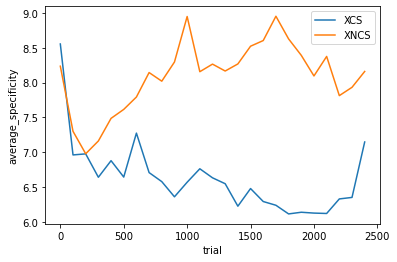

In [6]:
import pandas as pd
import numpy as np

ax = df[['average_specificity', "average_specificity_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS"])

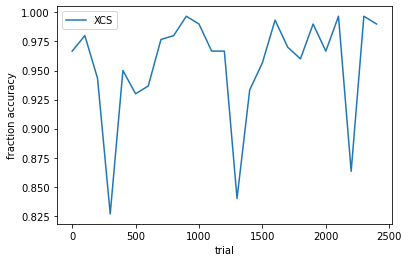

In [7]:
ax = df["fraction_accuracy_other"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XCS","XNCS"])

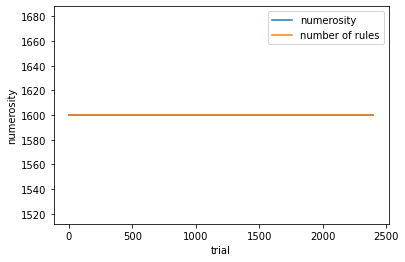

In [8]:
ax = df[['numerosity', 'numerosity_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("numerosity")
ax.legend(["numerosity", "number of rules"])

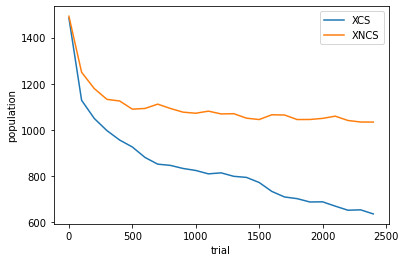

In [9]:
ax = df[['population', "population_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS"])

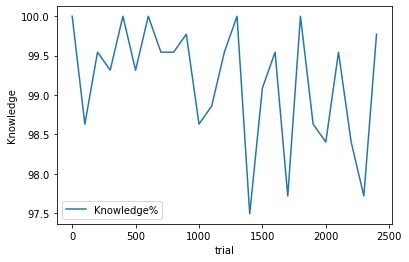

In [12]:
ax = df['knowledge'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["XCS"])

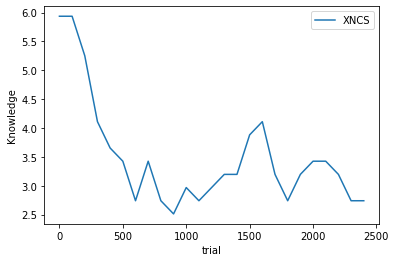

In [14]:
ax = df['knowledge_other'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["XNCS"])

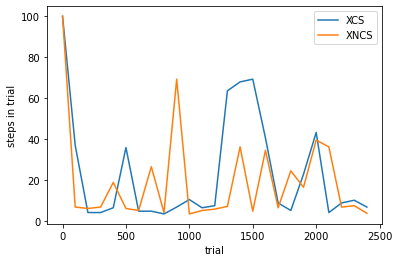

In [10]:
ax = df[['steps_in_trial', 'steps_in_trial_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS"])

In [11]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_other"])/number_of_experiments)

195.6666666666667
164.11111111111111
